1 Задание(Вариант 6)

Выполните по вариантам соответственно реализацию генетического
алгоритма в соответствии с приложенными начальными данными.

In [9]:
def qZ(x, y):
    # Функция качества, которая вычисляет "пригодность" пары (x, y)
    return (x + 3 * y) / (x ** 2 + y ** 2 + 1)

def qSumZ(Z):
    # Функция для вычисления суммы всех значений качества в списке Z
    # Используется для оценки общей пригодности популяции
    return sum(Z)

def exchangeScheme(oldX, oldY, sortdID):
    # Обмен значениями для создания новой популяции с учетом отобранных лучших решений
    # sortdID - индексы отсортированных значений качества Z
    X = [0 for i in range(4)]  # Новый массив для X
    Y = [0 for i in range(4)]  # Новый массив для Y

    # Сначала передаем лучшие элементы в новую популяцию
    X[2] = oldX[sortdID[2]]
    X[3] = oldX[sortdID[2]]
    X[0] = oldX[sortdID[0]]
    X[1] = oldX[sortdID[1]]

    Y[0] = oldY[sortdID[2]]
    Y[1] = oldY[sortdID[2]]
    Y[2] = oldY[sortdID[0]]
    Y[3] = oldY[sortdID[1]]

    return X, Y  # Возвращаем обновленные X и Y

def sorting(Z):
    # Функция для сортировки массива Z и возвращения индексов отсортированных значений
    # Это необходимо для того, чтобы отобрать лучшие решения (с наибольшими значениями качества)
    sortedID = sorted(range(len(Z)), key=lambda k: Z[k])  # Сортируем индексы по значениям качества
    return sortedID  # Возвращаем отсортированные индексы

def evoStep(X, Y, Z):
    # Шаг эволюции, где удаляется худшее решение (с минимальным качеством)
    _, minId = min((value, id) for (id, value) in enumerate(Z))  # Находим минимальное значение качества и его индекс
    X = X[:]  # Создаем копии списков для изменения
    Y = Y[:]
    Z = Z[:]

    # Удаляем худший элемент из X, Y, Z
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X, Y, Z  # Возвращаем обновленные списки без худшего элемента

def evoSteps(X, Y):
    # Основной цикл эволюции, выполняющий несколько шагов улучшения популяции
    results = []  # Массив для хранения результатов каждого шага

    for i in range(4):  # Выполняем 4 шага эволюции
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]  # Вычисляем качества для текущей популяции
        X, Y, Z = evoStep(X, Y, arrZ)  # Удаляем худшее решение
        X, Y = exchangeScheme(X, Y, sorting(Z))  # Применяем кроссовер для создания новой популяции
        results.append([X, Y, qSumZ(arrZ), arrZ])  # Сохраняем результаты текущего шага

    return X, Y, results  # Возвращаем финальные X, Y и список всех шагов

def main():
    # Начальные данные из задачи (по 6 варианту)
    X = [-5, -3, -2, -1]  # Начальные значения X
    Y = [-1, -2, 0, 1]  # Начальные значения Y

    results = evoSteps(X, Y)  # Запуск эволюции

    # Выводим суммарное качество популяции на каждом шаге
    for i in range(len(results[2])):
        print(f'max_{i + 1}_step: {results[2][i][2]}')

    qualityArrZ = []  # Массив для сбора всех качеств

    # Собираем все значения качества для дальнейшего анализа
    for i in range(len(results[2])):
        qualityArrZ += results[2][i][3]

    # Находим максимальное качество из всех шагов и выводим его
    print(f'max Z: {max(qualityArrZ)}')

if __name__ == "__main__":
    main()  # Запускаем программу


max_1_step: -0.6724867724867726
max_2_step: -1.7407407407407407
max_3_step: 0.35925925925925917
max_4_step: 1.4259259259259258
max Z: 0.6666666666666666


2 Задание(Вариант 6)

Найти длину гамильтонова цикла S4 в полном графе K6 после четырех
циклов решения задачи методом отжига по вариантам ниже.

Лучший выбранный маршрут: [1, 5, 6, 2, 4, 3, 1]
Длина лучшего выбранного маршрута: 163
Длины всех рассмотренных маршрутов: [146, 135, 167, 163, 194]


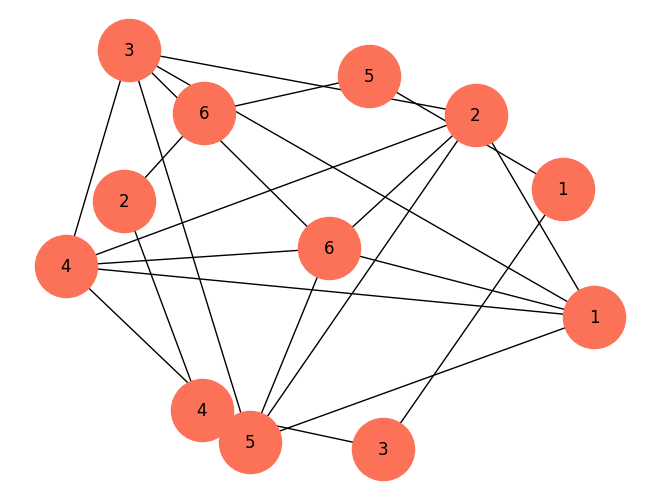

In [11]:
import networkx as nx
from math import e

# Данные о расстояниях между вершинами
distances = [
    (1, 2, 22), (1, 3, 43), (1, 4, 39), (1, 5, 28), (1, 6, 20),
    (2, 3, 26), (2, 4, 33), (2, 5, 36), (2, 6, 17), 
    (3, 4, 22), (3, 5, 40), (3, 6, 24), 
    (4, 5, 22), (4, 6, 19), 
    (5, 6, 20)
]

# Начальная последовательность вершин (маршрут)
V = [1, 3, 4, 5, 6, 2, 1]  

# Места замены (для теста)
Z = [(2, 4), (4, 6), (3, 5), (5, 2)]

# Вероятности для каждого замещения
P = [51, 23, 29, 31]

# параметр, который задает начальное состояние системы и контролирует вероятность принятия худших решений в начале процесса оптимизации
T = 150

def probability(delta, T):
    # Функция для вычисления вероятности принятия худшего решения
    # Чем больше ухудшение решения (delta), тем меньше вероятность принятия
    return 100 * e ** (-delta / T)

def reductTemp(prevT):
    # Функция для уменьшения температуры (охлаждение)
    return 0.5 * prevT  # Температура уменьшается в два раза на каждом шаге

# Создание графа для отображения
graph = nx.Graph()
graph.add_weighted_edges_from(distances)
nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

def edgeLength(i, j, distances, roundTrip=True):
    # Функция для нахождения длины ребра между вершинами i и j
    # Если roundTrip = True, то возвращаем длину ребра для обратного пути тоже
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or
                                (item[1] == i and item[0] == j) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

def routeLength(V, distances):
    # Функция для вычисления длины маршрута, заданного последовательностью вершин V
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))  # Для каждой пары соседних вершин
    return sum(edges)  # Суммируем длины всех ребер

def routeOneReplacement(arrV, Z, replacementByName=True):
    # Функция для выполнения одной замены маршрута
    # Z - пара вершин, которые нужно поменять местами
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV

def routeReplacement(V, Z):
    # Функция для выполнения нескольких замен в маршруте
    for z in Z:
        V = routeOneReplacement(V, z)  # Для каждой замены
    return V

def chooseRoute(distances, V, Z, T, P):
    # Основная функция для выбора маршрута с помощью метода отжига
    sumLength = routeLength(V, distances)  # Начальная длина маршрута
    arrSum = [sumLength]  # Массив для хранения длин маршрутов на каждом шаге

    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])  # Создаем новый маршрут после замены
        newS = routeLength(newV, distances)  # Длина нового маршрута
        arrSum.append(newS)  # Сохраняем длину нового маршрута
        deltaS = newS - sumLength  # Изменение длины маршрута

        if deltaS > 0:
            p = probability(deltaS, T)  # Вычисляем вероятность принятия худшего маршрута
            if p > P[i]:  # Если вероятность больше, чем заданная, принимаем новый маршрут
                V = newV
                sumLength = newS
        else:
            V = newV  # Если новое решение лучше, просто принимаем его
            sumLength = newS

        T = reductTemp(T)  # Охлаждаем систему (уменьшаем температуру)

    return V, arrSum  # Возвращаем новый маршрут и все длины маршрутов на каждом шаге

def drawRouteGraph(distances, bestRoute):
    # Функция для отрисовки графа маршрута
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)

    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

# Запускаем основной процесс поиска маршрута
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

# Выводим результаты
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances, bestRoute)  # Отображаем граф маршрута